<a href="https://colab.research.google.com/github/mfaysoares/Alura_Cash/blob/main/Alura_Cash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge Data Science: Alura Cash**

> Olá, tudo bem? ✌ Muito prazer em ter você aqui! Eu me chamo [Matheus](https://www.linkedin.com/in/matheusfay/), sou um Engenheiro Eletricista apaixonado por dados. Atualmente, estou estudando Data Science através da plataforma da [Alura](https://www.alura.com.br/).

Nesse Notebook estarão presentes os códigos e descrição dos desenvolvimentos realizados na 1º edição do Challenge Data Science, com o projeto ***Alura Cash***.

---

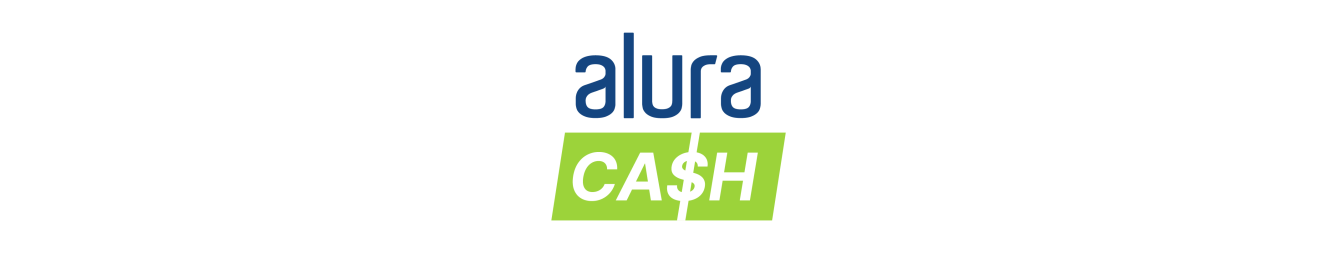

## **1. Desafio:** ✍

> Somos uma equipe de dados que foi contratada para fazer parte do banco digital internacional chamado Alura Cash. No primeiro dia, a diretoria financeira nos convocou para uma reunião para informar que, recorrentemente, estão surgindo pessoas inadimplentes após a liberação de créditos.

> Por conta disso, foi solicitada uma solução para diminuir as perdas financeiras geradas por pessoas mutuárias que não quitam suas dívidas. Nos foi informado também que teríamos o prazo de um mês para encontrar essa solução e apresentá-la à diretoria financeira. Sendo assim, solicitamos um conjunto de dados contendo as informações de clientes, da solicitação de empréstimo, do histórico de crédito, bem como se a pessoa mutuária é inadimplente ou não.

---

## **2. Tratando os Dados:** 🧹

Foram disponibilizados diversas base de dados com informações relativas a clientes que solicitaram crédito. Nesse capítulo, obtidas as informações de nossa fonte, será descrito todo o procedimento de preparação dos dados para posterior análise. 

Essa etapa de preparação é fundamental para início de qualquer projeto. Esse procedimento é conhecido como Data Preparation e pode ser dividido em 4 partes principais: ***Aquisição (1), Exploração (2), Limpeza (3) e Transformação (4)***.



Fonte: STEDMAN, Craig. What is data preparation?: An in-depth guide to data prep. [S. l.], 2022. Disponível em: https://www.techtarget.com/searchbusinessanalytics/definition/data-preparation. Acesso em: 2 set. 2022.












### **2.1 Analisando os Databases:**

Após gerar nossas tabelas pelos arquivos *dump* disponibilizados pela plataforma, utilizei a biblioteca pandas do Python para leitura e exploração inicial de nossos *dataframes*.

In [1]:
import pandas as pd

In [32]:
dados_mutuarios = pd.read_csv('dados_mutuarios.csv',
                              sep = ';',
                              decimal = ',',
                              encoding='latin-1')
dados_mutuarios.head(3)

,person_id,person_age,person_income,person_home_ownership,person_emp_length
0,tad8vkTn-vp4l,33,48000,Rent,17.0
1,dEILQqp2-lgLx,24,75000,Own,0.0
2,Az11sWWw-SdFA,29,28800,Rent,5.0


In [15]:
emprestimos = pd.read_csv('emprestimos.csv',
                          sep = ';',
                          decimal = ',',
                          encoding='latin-1')
emprestimos.head(3)

,loan_id,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,NMgFWFWN-2yGG,Homeimprovement,C,20000,13.22,0,0.22
1,08Ts3XSa-KkvE,Venture,C,6000,13.49,0,0.04
2,xo79pAME-elmp,Personal,A,8000,6.17,0,0.13


In [16]:
historico_bancario = pd.read_csv('historicos_banco.csv',
                                sep = ';',
                                decimal = ',',
                                encoding='latin-1')
historico_bancario.head(3)

,cb_id,cb_person_default_on_file,cb_person_cred_hist_length
0,ZNWGR0Ap-FDt2,N,9
1,wqALDH4x-mnzE,N,7
2,57O09sJw-NBKj,N,6


In [17]:
id = pd.read_csv('id.csv',
                sep = ';',
                decimal = ',',
                encoding='latin-1')
id.head(3)

,person_id,loan_id,cb_id
0,JAz2tRvQ-14cy,pjEu6snv-4t33,FIgNSkrG-wen7
1,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK
2,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q


Analisando os dados iniciais percebemos que cada uma das tabelas fornece diferentes informações que trazem dados tanto de informações do cliente como transações bancárias. Em primeira vista, as bases parecem não conversarem entre si, mas aos analisarmos o *dataframe* **ID**, percebemos a sua importância em relacionar cada cliente com o respectivo código de cada tabela.

### **2.2 Limpando os Dados:**

Antes de agregarmos os dados em uma base completa, é importante realizar o procedimento de limpeza, evitando assim que possíveis valores incorretos prejudiquem nossa análise.


#### **2.2.1 Dados Mutuários:**

Iniciando pelo dataframe de dados mutuários, através da função describe, percebemos que a coluna ***person_age***, que informa a idade (em anos) da pessoa que solicitou o empréstimo apresenta como valor mínimo 0. Concordamos que esse valor é ERRADO, dessa forma é necessário retirar esse valores de nossa base.

Da mesma forma, para a coluna ***person_income***, que informa o salário anual do solicitante, também tem como valor mínimo 0. Com isso, dado a incoerência desses dados, os clientes com esses valores serão exclusos da análise.

In [33]:
dados_mutuarios.describe()

,person_age,person_income
count,34489.000000,3.448900e+04
mean,27.472759,6.538133e+04
std,6.854709,6.145298e+04
min,0.000000,0.000000e+00
25%,23.000000,3.800000e+04
50%,26.000000,5.500000e+04
75%,30.000000,7.870000e+04
max,144.000000,6.000000e+06


In [34]:
dados_mutuarios = dados_mutuarios[(dados_mutuarios['person_age'] > 0) &
                                 (dados_mutuarios['person_income'] > 0)]
dados_mutuarios.reset_index(drop = True, inplace = True)
dados_mutuarios.describe()                             

,person_age,person_income
count,33868.000000,3.386800e+04
mean,27.736182,6.601453e+04
std,6.349116,6.154255e+04
min,20.000000,4.000000e+03
25%,23.000000,3.841500e+04
50%,26.000000,5.500000e+04
75%,30.000000,7.906250e+04
max,144.000000,6.000000e+06


#### **2.2.2 Empréstimos:**

Seguindo a mesma linha de raciocínio do item ***2.2.1***, analisaremos o dataframe **emprestimos.csv**. A descrição inicial já demonstra que a coluna ***loan_amnt***, que representa o valor total de empréstimo solicitado, tem como valor mínimo 0. Visto que em uma base que trata de empréstimos solicitados, não faz sentido para nossa análise considerarmos esse tipo de informação. Logo, a mesma será retirada.

In [35]:
emprestimos.describe()

,loan_amnt,loan_status
count,34489.000000,34489.000000
mean,9498.521268,0.216011
std,6359.726741,0.411528
min,0.000000,0.000000
25%,5000.000000,0.000000
50%,8000.000000,0.000000
75%,12000.000000,0.000000
max,35000.000000,1.000000


In [36]:
emprestimos = emprestimos[(emprestimos['loan_amnt'] > 0)]
emprestimos.reset_index(drop = True, inplace = True)
emprestimos.describe()  

,loan_amnt,loan_status
count,34158.000000,34158.000000
mean,9590.564436,0.216201
std,6321.020289,0.411659
min,500.000000,0.000000
25%,5000.000000,0.000000
50%,8000.000000,0.000000
75%,12200.000000,0.000000
max,35000.000000,1.000000


Vale destacar que apesar da coluna ***loan_status*** também apresentar como valor mínimo 0, essa coluna fornece uma outra informação, que é o risco de inadimplência. Dessa forma, para essa coluna FAZ sentido esse valor.

#### **2.2.3 Históricos Bancários:**

No dataframe `historicos_banco.csv`, nos é fornecido o histórico de empréstimo de cada cliente. Analisando pelo mesmo procedimento das demais, verificamos que tal base não aparenta inconsistências de informação.

Apesar da coluna ***cb_person_cred_hist_length*** apresentar dado mínimo de 0, esse dado diz respeito ao tempo (em anos) desde a primeira solicitação de crédito ou aquisição de um cartão de crédito. Logo, um valor mínimo de zero é coerente.

In [39]:
historico_bancario.describe()

,cb_person_cred_hist_length
count,34489.000000
mean,5.808316
std,4.063731
min,0.000000
25%,3.000000
50%,4.000000
75%,8.000000
max,30.000000


#### **2.2.4 ID:**

Esse dataframe fornece as informações que relacionam todas as bases de dados. As informações em cada uma de suas colunas são:

*   **person_id**: ID da pessoa solicitante
*   **loan_id**: ID da solicitação de empréstico de cada solicitante
*   **cb_id**: ID do histórico de cada solicitante



In [40]:
id.describe()

,person_id,loan_id,cb_id
count,14952,14952,14952
unique,14952,14952,14952
top,JAz2tRvQ-14cy,pjEu6snv-4t33,FIgNSkrG-wen7
freq,1,1,1


### **2.3 Agregando as Bases:**

Realizado o processo de limpeza de nossos dados, é chego a hora de agregar as informações em um arquivo só e exportá-lo em uma base. Para tal processo, será utilizada a função `merge` partindo do id fornecido.

In [66]:
base_agg = id.merge(dados_mutuarios, how = 'left', left_on = 'person_id', right_on = 'person_id')
base_agg.dropna(subset = ['person_age'], inplace = True)

In [67]:
base_agg = base_agg.merge(emprestimos, how = 'left', left_on = 'loan_id', right_on = 'loan_id')
base_agg.dropna(subset = ['loan_intent'], inplace = True)

In [68]:
base_agg = base_agg.merge(historico_bancario, how = 'left', left_on = 'cb_id', right_on = 'cb_id')
base_agg.dropna(subset = ['cb_person_default_on_file'], inplace = True)

In [69]:
base_agg.dropna(inplace = True)

In [71]:
base_agg.head(3)

,person_id,loan_id,cb_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK,22.0,29000.0,Mortgage,5.0,Debtconsolidation,B,9000.0,0.0,1.0,0.31,N,4
1,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q,31.0,19968.0,Rent,1.0,Education,B,2500.0,9.62,1.0,0.13,N,6
3,Hbz9PtI3-tOFs,bFMFchcv-UwQW,PkBixMJ3-3bad,29.0,42000.0,Rent,4.0,Venture,G,1600.0,19.16,0.0,0.04,Y,6


### **2.4 Melhorando a Base:**

Para finalizar, vamos tornar as informações de nossa base final mais claras para a análise. Conforme verificamos anteriormente, muitas das colunas estão em inglês. Visto que temos nosso dicionário com a explicação de cada uma delas, vamos renomear as colunas para deixar mais clara as futuras análises.

In [89]:
base_agg.rename(columns={"person_age": "idade", 
                         "person_income": "salario_anual",
                         "person_home_ownership":"situacao_moradia",
                         "person_emp_length":"anos_trabalhados",
                         "loan_intent":"motivo_emprestimo",
                         "loan_grade":"pontuacao_emprestimo",
                         "loan_amnt":"valor_emprestimo",
                         "loan_int_rate":"taxa_juros",
                         "loan_status":"inadimplencia",
                         "loan_percent_income":"comprometimento_renda",
                         "cb_person_default_on_file":"historico_inadimplencia",
                         "cb_person_cred_hist_length":"tempo_credito"},
                inplace = True)
base_agg.head(3)

,person_id,loan_id,cb_id,idade,salario_anual,situacao_moradia,anos_trabalhados,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,comprometimento_renda,historico_inadimplencia,tempo_credito
0,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK,22.0,29000.0,Mortgage,5.0,Debtconsolidation,B,9000.0,0.0,1.0,0.31,N,4
1,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q,31.0,19968.0,Rent,1.0,Education,B,2500.0,9.62,1.0,0.13,N,6
3,Hbz9PtI3-tOFs,bFMFchcv-UwQW,PkBixMJ3-3bad,29.0,42000.0,Rent,4.0,Venture,G,1600.0,19.16,0.0,0.04,Y,6


Para melhorar ainda mais nossa base de dados, iremos traduzir as colunas `situacao_moradia` e `motivo_emprestimo`, ficando mais clara no Português.

In [90]:
import numpy as np

base_agg['situacao_moradia'] = np.where(base_agg['situacao_moradia'] == 'Mortgage', 'Hipotecada', base_agg['situacao_moradia'])
base_agg['situacao_moradia'] = np.where(base_agg['situacao_moradia'] == 'Rent', 'Alugada', base_agg['situacao_moradia'])
base_agg['situacao_moradia'] = np.where(base_agg['situacao_moradia'] == 'Own', 'Propria', base_agg['situacao_moradia'])
base_agg['situacao_moradia'] = np.where(base_agg['situacao_moradia'] == 'Other', 'Outros', base_agg['situacao_moradia'])

base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Personal', 'Pessoal', base_agg['motivo_emprestimo'])
base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Education', 'Educativo', base_agg['motivo_emprestimo'])
base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Medical', 'Medico', base_agg['motivo_emprestimo'])
base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Venture', 'Empreendimento', base_agg['motivo_emprestimo'])
base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Homeimprovement', 'Melhora_Lar', base_agg['motivo_emprestimo'])
base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Debtconsolidation', 'Pagamento_Debitos', base_agg['motivo_emprestimo'])

In [91]:
base_agg.head(3)

,person_id,loan_id,cb_id,idade,salario_anual,situacao_moradia,anos_trabalhados,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,comprometimento_renda,historico_inadimplencia,tempo_credito
0,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK,22.0,29000.0,Hipotecada,5.0,Pagamento_Debitos,B,9000.0,0.0,1.0,0.31,N,4
1,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q,31.0,19968.0,Alugada,1.0,Educativo,B,2500.0,9.62,1.0,0.13,N,6
3,Hbz9PtI3-tOFs,bFMFchcv-UwQW,PkBixMJ3-3bad,29.0,42000.0,Alugada,4.0,Empreendimento,G,1600.0,19.16,0.0,0.04,Y,6


### **2.5 Exportando:**

Por fim, vamos exportar nosso arquivo final agregado:

In [92]:
base_agg.to_csv('dados_financeiros.csv',
                sep = ';',
                index = False,
                decimal = ',')

---